In [14]:
from pylab import *
import netCDF4
import os 
import numpy as np
import ease2conv as e2

In [3]:
path = os.getcwd()
path 

'/Users/williamnorris/SWE_TB'

In [15]:
def get_xy(ll_ul, ll_lr):
    N6 = e2.Ease2Transform("EASE2_N6.25km")
    N3 = e2.Ease2Transform("EASE2_N3.125km")
    # get x,y for 6.25
    row, col = N6.geographic_to_grid(ll_ul[0], ll_ul[1])
    x6ul, y6ul = N6.grid_to_map(row,col)
    row, col = N6.geographic_to_grid(ll_lr[0], ll_lr[1])
    x6lr, y6lr = N6.grid_to_map(row, col)
    # get x,y for 3.125
    row, col = N6.geographic_to_grid(ll_ul[0], ll_ul[1])
    x3ul, y3ul = N6.grid_to_map(row, col)
    row, col = N6.geographic_to_grid(ll_lr[0], ll_lr[1])
    x3lr, y3lr = N6.grid_to_map(row, col)
    list_6 = [x6ul, y6ul, x6lr, y6lr]
    list_3 = [x3ul, y3ul, x3lr, y3lr]
    return list_3, list_6

In [17]:
up_left = [62.27, -140.17]

# lower right 
low_right = [73,64, -166.08]

list3, list6 = get_xy(up_left, low_right)

In [52]:
print(list6)

[-1963074.6715945164, 2353648.404104936, 1699881.5994287431, -829087.6527448576]


In [67]:
f = netCDF4.Dataset(path + '/data/concatenated/all_days_2015_19H_F19.nc')

In [70]:
# upper left 
lat_bounds = [62.27, -140.17]

# lower right 
lon_bounds =[73,64, -166.08]


#f = Dataset( filename, "r", format="NETCDF4")


lats = f.variables['x'][:]
lons = f.variables['y'][:]

latli = np.argmin(np.abs(lats - list6[0]))
latui = np.argmin(np.abs(lats- list6[2]))

lonli = np.argmin(np.abs(lons - list6[1]))
lonui = np.argmin(np.abs(lons - list6[3]))

subset = f.variables['TB'][:, latli:latui, lonli:lonui]

In [71]:
np.shape(subset)

(365, 94, 93)

In [72]:
swe_image = subset[1, :, : ]

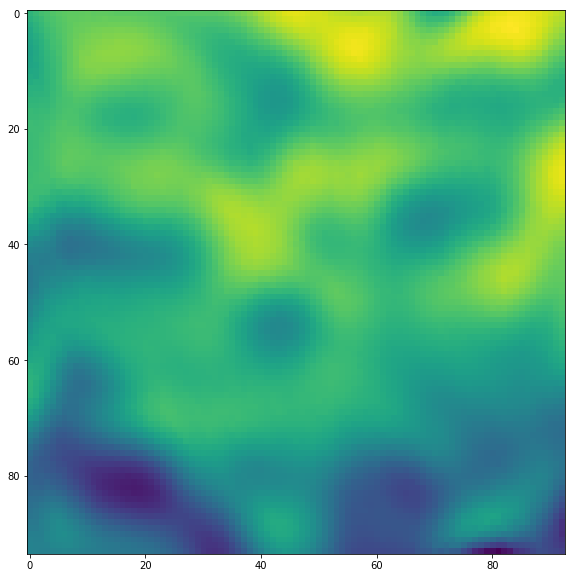

In [73]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.imshow(swe_image)